# Some Solutions of Einstein's Gravitational Equations For Systems With Axial Symmetry by Andress
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 22, 2022

There are several metrics in this paper, here we concentrate on equation 2.0  Will return and do others later

https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1930.0028

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
x,r,theta,t,dx,dr,dtheta,dt = symbols('x r theta t dx dr dtheta dt')

In [4]:
Lambda = Function('lambda')(x,r)
Lambda

In [5]:
rho = Function('rho')(x,r)
rho

In [6]:
variables = Matrix([x,r,theta,t])
variables

⎡x⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣t⎦

In [7]:
differentials = Matrix([dx,dr,dtheta,dt])
differentials 

⎡  dx  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣  dt  ⎦

In [8]:
lineElement = expand( -exp(Lambda)*(dx**2 + dr**2) -r**2 * exp(-rho) *dtheta**2 + exp(rho)*dt**2 ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  λ(x, r)                                    ⎤
⎢-ℯ             0            0           0    ⎥
⎢                                             ⎥
⎢             λ(x, r)                         ⎥
⎢    0      -ℯ               0           0    ⎥
⎢                                             ⎥
⎢                        2  -ρ(x, r)          ⎥
⎢    0          0      -r ⋅ℯ             0    ⎥
⎢                                             ⎥
⎢                                      ρ(x, r)⎥
⎣    0          0            0        ℯ       ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  λ(x, r)                                    ⎤
⎢-ℯ             0            0           0    ⎥
⎢                                             ⎥
⎢             λ(x, r)                         ⎥
⎢    0      -ℯ               0           0    ⎥
⎢                                             ⎥
⎢                        2  -ρ(x, r)          ⎥
⎢    0          0      -r ⋅ℯ             0    ⎥
⎢                                             ⎥
⎢                                      ρ(x, r)⎥
⎣    0          0            0        ℯ       ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("x r theta t")
x,r,theta,t = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂                                                                                ⎤  ⎡ ∂             ∂                  
⎢⎢──(λ(x, r))   ──(λ(x, r))                                                                      ⎥  ⎢-──(λ(x, r))   ──(λ(x, r))        
⎢⎢∂x            ∂r                                                                               ⎥  ⎢ ∂r            ∂x                 
⎢⎢───────────   ───────────                   0                                  0               ⎥  ⎢─────────────  ───────────        
⎢⎢     2             2                                                                           ⎥  ⎢      2             2             
⎢⎢                                                                                               ⎥  ⎢                                  
⎢⎢∂             ∂                                                                                ⎥  ⎢ ∂             ∂                  
⎢⎢──(λ(x, r))  -──(λ(x, r))                     

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡ ⎛    2                2                           2              ⎞                                                                   
⎢ ⎜   ∂                ∂               ⎛∂          ⎞    ∂          ⎟                                                                   
⎢-⎜r⋅───(λ(x, r)) + r⋅───(λ(x, r)) + r⋅⎜──(ρ(x, r))⎟  + ──(λ(x, r))⎟                   ∂           ∂             ∂             ∂       
⎢ ⎜    2                2              ⎝∂x         ⎠    ∂r         ⎟               - r⋅──(ρ(x, r))⋅──(ρ(x, r)) + ──(λ(x, r)) + ──(ρ(x, 
⎢ ⎝  ∂r               ∂x                                           ⎠                   ∂r          ∂x            ∂x            ∂x      
⎢────────────────────────────────────────────────────────────────────              ────────────────────────────────────────────────────
⎢                                2⋅r                                                                         2⋅r                       
⎢                                               

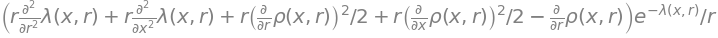

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                         ⎛                                                 2          
⎢                                                                         ⎜                                    ⎛∂          ⎞      ⎛∂   
⎢      2                2                           2                     ⎜    2                2            r⋅⎜──(ρ(x, r))⎟    r⋅⎜──(ρ
⎢     ∂                ∂               ⎛∂          ⎞    ∂                 ⎜   ∂                ∂               ⎝∂r         ⎠      ⎝∂x  
⎢  r⋅───(λ(x, r)) + r⋅───(λ(x, r)) + r⋅⎜──(ρ(x, r))⎟  + ──(λ(x, r))   0.5⋅⎜r⋅───(λ(x, r)) + r⋅───(λ(x, r)) + ──────────────── + ───────
⎢      2                2              ⎝∂x         ⎠    ∂r                ⎜    2                2                   2                  
⎢    ∂r               ∂x                                                  ⎝  ∂r               ∂x                                       
⎢- ─────────────────────────────────────────────

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡ ⎛    2                2                           2              ⎞                                                                   
⎢ ⎜   ∂                ∂               ⎛∂          ⎞    ∂          ⎟                                                                   
⎢-⎜r⋅───(λ(x, r)) + r⋅───(λ(x, r)) + r⋅⎜──(ρ(x, r))⎟  + ──(λ(x, r))⎟                   ∂           ∂             ∂             ∂       
⎢ ⎜    2                2              ⎝∂x         ⎠    ∂r         ⎟               - r⋅──(ρ(x, r))⋅──(ρ(x, r)) + ──(λ(x, r)) + ──(ρ(x, 
⎢ ⎝  ∂r               ∂x                                           ⎠                   ∂r          ∂x            ∂x            ∂x      
⎢────────────────────────────────────────────────────────────────────              ────────────────────────────────────────────────────
⎢                                2⋅r                                                                         2⋅r                       
⎢                                               

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                            ∂                 ∂                            ∂           ∂             ∂             ∂  
⎢                  2                     2   ──(λ(x, r))   0.5⋅──(ρ(x, r))              - r⋅──(ρ(x, r))⋅──(ρ(x, r)) + ──(λ(x, r)) + ──(
⎢     ⎛∂          ⎞         ⎛∂          ⎞    ∂r                ∂r                           ∂r          ∂x            ∂x            ∂x 
⎢0.25⋅⎜──(ρ(x, r))⎟  - 0.25⋅⎜──(ρ(x, r))⎟  - ─────────── - ───────────────              ───────────────────────────────────────────────
⎢     ⎝∂r         ⎠         ⎝∂x         ⎠        2⋅r              r                                               2⋅r                  
⎢                                                                                                                                      
⎢             ∂           ∂             ∂             ∂                                                                       ∂        
⎢         - r⋅──(ρ(x, r))⋅──(ρ(x, r)) + ──(λ(x, 

In [30]:
equation2pt21  =  Eq( diff(Lambda,r), solve( einsteinSimplified[0,0], diff(Lambda,r) )[0] ) 
equation2pt21

In [27]:
equation2pt22 = Eq( diff(Lambda,x) , expand(solve( einsteinSimplified[1,0], diff(Lambda,x) )[0]) ) 
equation2pt22

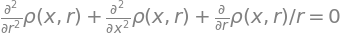

In [36]:
equation2pt23 = Eq( expand((1/r)*ricciSimplified[2,2].args[2]),0 )
equation2pt23

In [38]:
vacuumFieldEquations = Matrix([equation2pt21,equation2pt22,equation2pt23])
vacuumFieldEquations

⎡                                 2                      2              ⎤
⎢∂                   ⎛∂          ⎞          ⎛∂          ⎞    ∂          ⎥
⎢──(λ(x, r)) = 0.5⋅r⋅⎜──(ρ(x, r))⎟  - 0.5⋅r⋅⎜──(ρ(x, r))⎟  - ──(ρ(x, r))⎥
⎢∂r                  ⎝∂r         ⎠          ⎝∂x         ⎠    ∂r         ⎥
⎢                                                                       ⎥
⎢         ∂               ∂           ∂             ∂                   ⎥
⎢         ──(λ(x, r)) = r⋅──(ρ(x, r))⋅──(ρ(x, r)) - ──(ρ(x, r))         ⎥
⎢         ∂x              ∂r          ∂x            ∂x                  ⎥
⎢                                                                       ⎥
⎢                                           ∂                           ⎥
⎢               2              2            ──(ρ(x, r))                 ⎥
⎢              ∂              ∂             ∂r                          ⎥
⎢             ───(ρ(x, r)) + ───(ρ(x, r)) + ─────────── = 0             ⎥
⎢               2              2      